# Problema 1: Evaluación de Clusterizaciones

Este problema será un ejercicio similar a lo que vimos en la sesión anterior, donde clusterizamos los datos con diferentes algoritmos y evaluamos los resultados. Trabajaremos con la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) del 2016 para clusterizar los distintos tipos de hogares que existen en México. Puedes encontrar la descripción general de la encuesta [aquí](https://www.inegi.org.mx/programas/enigh/nc/2016/) y la descripción de las variables contenidas en la base de datos en los archivos `catalogo_datos.csv` y `diccionario_datos.csv`. Usaremos las siguientes librerías y funciones:

In [4]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

**1.** Comenzaremos por importar los datos del archivo `conjunto_de_datos_concentradohogar_enigh_2016_ns.csv` a un dataframe y limpiar los datos existentes. Explica lo que hace cada una de las siguientes líneas de código y su propósito:

In [30]:
df=pd.read_csv('datos_concentradohogar_enigh_2016/conjunto_de_datos_concentradohogar_enigh_2016_ns.csv') #importar datos
df['sexo_jefe'] = df['sexo_jefe'].apply(lambda x: x - 1) 
# resta 1 al valor de sexo_jefe (hombre,mujer)=(1,2)-> (hombre,mujer)=(0,1)
# al estandarizar, los datos severán de la misma manera

eliminar=['foliohog','ageb','tam_loc','est_socio','est_dis','upm','factor'] #lista de columnas a eliminar
df2=df.drop(eliminar, axis=1) # eliminar columnas definidas, no tienen información que nos sea útil
df2=df2[df2.rentas<30000000] # filtra los datos con valores muy elevados de ingresos por rentas. 
# de no hacerse estos datos los podrá considerar en un cluster en sí mismo

**2.** El siguiente código genera una gráfica de la matriz de covarianza de los datos en la tabla. En base a los resultados genera una lista (como en la siguiente celda de abajo) de qué variables utilizarías o eliminarías para el análisis de la clusterización. Puedes utilizar el criterio de covarianza o argumentar qué variables tienen el mayor poder de explicación.

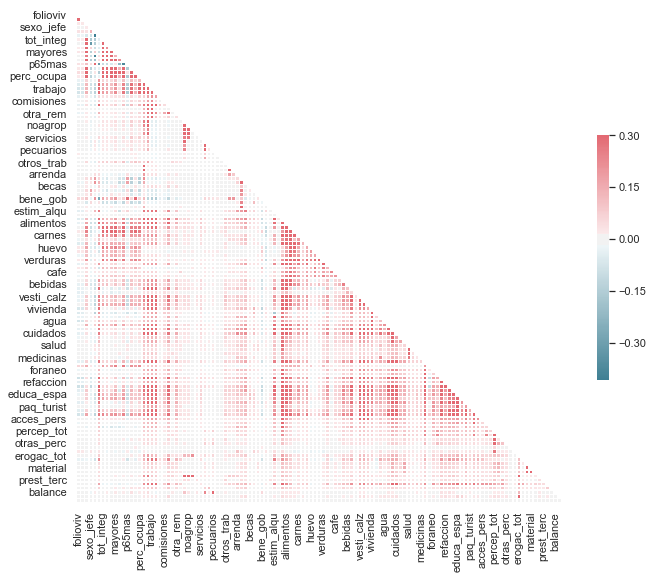

In [6]:
sns.set(style="white")

# Compute the correlation matrix
corr = df2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [16]:
#lista_ejemplo
variables=[
"folioviv",
"sexo_jefe",
"tot_integ",
"mayores"
]

In [7]:
variables=[#'clase_hog',
'sexo_jefe',
'edad_jefe',
'tot_integ',
'menores',
'p65mas',
'ocupados',
'educa_jefe',
'ingtrab',
#'trabajo',
#'sueldos',
'horas_extr',
'comisiones',   #lunes 11 de febrero
'rentas',
#'transfer',
'jubilacion',
'becas',
'ali_dentro',
'ali_fuera',
'vesti_calz',
'alquiler',
'salud',
'publico',
'educacion',
'esparci',
'cuida_pers',
'otros_gas',
'prestamos',
'deposito',
'prest_terc',
'pago_tarje',
'deudas']
print (len(variables), 'Variables')
df3=df2[variables]

28 Variables


**3.** Crea un dataframe que contenga únicamente las variables seleccionadas en el inciso anterior y estandariza los datos. Asegúrate de que el dataframe resultante no tenga entradas vacías o NaNs.

In [10]:
df3.isna().sum().sum()

0

In [95]:
X=(df3-df3.mean())/df3.std()

**4.** 

**a)** Utiliza el algoritmo de K-Means clustering con el dataframe resultante el inciso anterior. Emplea el método de distorsión visto en clase para seleccionar el número de clusters $k$. ¿Se obtiene un valor claro apartir de esta gráfica? Elije un valor del parámetro. 

**b)** Obtén una clusterización final con ese parámetro, pues se utilizará en el inciso 6. Añade las etiquetas como una columna adicional al dataframe.

calculando  1  clusters
calculando  2  clusters
calculando  3  clusters
calculando  4  clusters
calculando  5  clusters
calculando  6  clusters
calculando  7  clusters
calculando  8  clusters
calculando  9  clusters
calculando  10  clusters
calculando  11  clusters
calculando  12  clusters
calculando  13  clusters
calculando  14  clusters
calculando  15  clusters
calculando  16  clusters
calculando  17  clusters
calculando  18  clusters
calculando  19  clusters


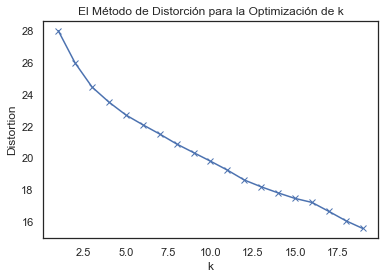

In [19]:
import scipy.spatial.distance as ssd

distortions = []
K = range(1,20)
for k in K:
    print ('calculando ',k,' clusters')
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(ssd.cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('El Método de Distorción para la Optimización de k')
plt.show()

In [23]:
kmeanModel = KMeans(n_clusters=3)
km_labels=kmeanModel.fit_predict(X)

df3['km_labels']=km_labels

/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
df3.isna().sum().sum()

0

**5.** Para este inciso escoge uno de los siguientes algoritmos vistos en clase: `DBSCAN` o `Agglomerative Hierarchical Clustering`.

**a)** Utiliza el método de la Silueta para seleccionar los parámetros del algoritmo correspondiente. 

**b)** Obtén una clusterización final, que se utilizará en el inciso 6. Añade las etiquetas como una columna adicional al dataframe.

In [110]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

grid_dbs={'eps':np.logspace(-2,1.1,20),'min_samples':np.arange(2,10,1)}

resultados=[]

for e in grid_dbs['eps']:
    for s in grid_dbs['min_samples']:
        
        print(e,s)
        
        try:
            DBS=DBSCAN(eps=e,min_samples=s)
            predicted_dbs = DBS.fit_predict(X.iloc[:10000,:])
            sil=silhouette_score(X.iloc[:10000,:],predicted_dbs)
            resultados.append([sil,e,s,predicted_dbs])
        except:
            pass
        
res_dbs_df=pd.DataFrame(resultados)
res_dbs_df.columns=['sil','eps','min samples','Predictions']
res_dbs_df=res_dbs_df.sort_values(by=['sil'],ascending=False)
res_dbs_df.iloc[0,-1]

0.01 2
0.01 3
0.01 4
0.01 5
0.01 6
0.01 7
0.01 8
0.01 9
0.014559883323191877 2
0.014559883323191877 3
0.014559883323191877 4
0.014559883323191877 5
0.014559883323191877 6
0.014559883323191877 7
0.014559883323191877 8
0.014559883323191877 9
0.021199020238496093 2
0.021199020238496093 3
0.021199020238496093 4
0.021199020238496093 5
0.021199020238496093 6
0.021199020238496093 7
0.021199020238496093 8
0.021199020238496093 9
0.030865526123848623 2
0.030865526123848623 3
0.030865526123848623 4
0.030865526123848623 5
0.030865526123848623 6
0.030865526123848623 7
0.030865526123848623 8
0.030865526123848623 9
0.04493984590721668 2
0.04493984590721668 3
0.04493984590721668 4
0.04493984590721668 5
0.04493984590721668 6
0.04493984590721668 7
0.04493984590721668 8
0.04493984590721668 9
0.06543189129712969 2
0.06543189129712969 3
0.06543189129712969 4
0.06543189129712969 5
0.06543189129712969 6
0.06543189129712969 7
0.06543189129712969 8
0.06543189129712969 9
0.09526807029019818 2
0.0952680702901981

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
res_dbs_df.iloc[0,:]

sil                                                     0.851176
eps                                                      12.5893
min samples                                                    4
Predictions    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 83, dtype: object

In [114]:
predicted_dbs.shape, df3.shape

((10000,), (70310, 29))

In [118]:
df3.shape[]

(70310, 29)

In [124]:
DBS=DBSCAN(eps=12.5893,min_samples=4)
predicted_dbs = DBS.fit_predict(X.iloc[:10000,:])

df3['dbs_labels']=np.full(df3.shape[0], -1)
df3['dbs_labels'].iloc[:10000]=predicted_dbs

/home/arturo/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [122]:
df3

,sexo_jefe,edad_jefe,tot_integ,menores,p65mas,ocupados,educa_jefe,ingtrab,horas_extr,comisiones,...,esparci,cuida_pers,otros_gas,prestamos,deposito,prest_terc,pago_tarje,deudas,km_labels,dbs_labels
0,0,66,2,0,1,0,3,0.00,0.00,0.00,...,0.00,264.17,150.00,0.00,0.00,0.00,0.00,0.00,2,0.0
1,0,53,1,0,0,1,6,0.00,0.00,0.00,...,0.00,174.18,0.00,0.00,2934.78,0.00,0.00,0.00,2,0.0
2,0,68,4,0,1,1,4,2885.86,0.00,0.00,...,0.00,1204.79,0.00,0.00,0.00,0.00,0.00,0.00,2,0.0
3,0,51,2,0,0,1,9,50429.32,0.00,0.00,...,391.30,673.53,1386.95,0.00,0.00,0.00,0.00,0.00,1,0.0
4,0,38,3,1,0,1,10,35801.10,0.00,0.00,...,1306.44,5051.58,1170.00,0.00,0.00,0.00,0.00,0.00,0,0.0
5,0,32,2,0,0,2,11,132265.17,0.00,0.00,...,6331.89,3948.35,1443.09,0.00,3580.11,0.00,17602.20,0.00,0,0.0
6,1,50,3,0,0,3,8,53676.77,0.00,2983.42,...,1829.03,2061.24,1193.37,13922.65,0.00,0.00,4475.13,1243.09,1,0.0
7,0,63,5,0,0,3,4,83535.87,0.00,0.00,...,588.00,827.40,0.00,2983.42,0.00,0.00,0.00,497.23,1,0.0
8,0,62,3,0,0,1,4,18099.44,0.00,0.00,...,0.00,1219.32,0.00,0.00,0.00,0.00,0.00,0.00,2,0.0
9,0,53,6,2,0,3,8,57880.73,0.00,0.00,...,5601.32,2325.45,260.00,0.00,0.00,0.00,8804.34,0.00,1,0.0


**6.** La siguiente función imprime una descripción estadística de las distintas variables en cada uno de los clusters. Toma como parámetros el dataframe (no estandarizado) `df`, el nombre de la columna de etiquetas `label_column` (como string) y la lista de variables seleccionadas en el inciso 2 `variable_list`. 

In [26]:
def describe_clusters(df,label_column,variable_list=variables):
    df=df.dropna()
    n_clusters=len(df[label_column].unique())
    for i in range(n_clusters):
        c_aux=df[df[label_column]==i]
        print ('-------------------- cluster ',i,'---------------------------')
        print ('No de hogares: ',len(c_aux))
        
        for var in variable_list:
            #c_aux.hist(column=var)
            des=c_aux.describe(percentiles=[.1,.2,.3, .4,.5, .6,.7,.8,.9])
            print (var,'media ',des[var]['mean'],'[',des[var]['min'],',',des[var]['max'],']',
            '(',des[var]['10%'],',',des[var]['20%'],',',des[var]['30%'],',',des[var]['40%'],',',
            des[var]['50%'],',',des[var]['60%'],',',des[var]['70%'],',',des[var]['80%'],',',des[var]['90%'],')')
            print()
            

Utiliza la función para obtener descripciones de las clusterizaciones finales obtenidas en los incisos 4 y 5. Analiza la información y responde las siguientes preguntas:
- ¿Qué tipos de familias se encuentran en cada caso? Haz una breve descripción.
- ¿Qué variables consideras son más relevantes para poder diferenciar unas familias de otras?
- ¿Cómo difieren las clusterizaciones de los dos algoritmos entre sí?
- Según el resumen obtenido de la función, ¿cuál de los dos resultados de la clusterización crees que sea mejor? Argumenta.

In [27]:
describe_clusters(df3,'km_labels',variables)

-------------------- cluster  0 ---------------------------
No de hogares:  5209
sexo_jefe media  0.2153964292570551 [ 0.0 , 1.0 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 1.0 )

edad_jefe media  46.91457093492033 [ 18.0 , 95.0 ] ( 30.0 , 35.0 , 39.0 , 43.0 , 46.0 , 50.0 , 54.0 , 58.0 , 64.0 )

tot_integ media  3.832405452102131 [ 1.0 , 21.0 ] ( 2.0 , 2.0 , 3.0 , 3.0 , 4.0 , 4.0 , 4.0 , 5.0 , 6.0 )

menores media  0.6863121520445383 [ 0.0 , 8.0 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 1.0 , 1.0 , 2.0 )

p65mas media  0.17584949126511806 [ 0.0 , 5.0 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 )

ocupados media  2.0038395085429066 [ 0.0 , 10.0 ] ( 1.0 , 1.0 , 1.0 , 2.0 , 2.0 , 2.0 , 2.0 , 3.0 , 3.0 )

educa_jefe media  8.552121328469957 [ 1.0 , 11.0 ] ( 6.0 , 6.0 , 8.0 , 8.0 , 10.0 , 10.0 , 10.0 , 10.0 , 11.0 )

ingtrab media  87835.49439431763 [ 0.0 , 4230293.46 ] ( 14945.434000000001 , 37585.03000000001 , 51467.89 , 62610.07400000001 , 73278.66 , 85618.98 , 101386.9

ingtrab media  11094.758928026753 [ 0.0 , 223769.5 ] ( 0.0 , 0.0 , 660.32 , 3207.7060000000015 , 6652.12 , 10314.580000000002 , 14270.646 , 19180.399999999998 , 28369.56 )

horas_extr media  51.78056083042261 [ 0.0 , 18765.74 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 )

comisiones media  163.07340827470875 [ 0.0 , 60834.09 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 )

rentas media  1382.6701416834724 [ 0.0 , 635869.56 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 )

jubilacion media  4819.045639789427 [ 0.0 , 169043.47 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 6661.95 , 12983.6 )

becas media  27.035968908348536 [ 0.0 , 38360.65 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 )

ali_dentro media  5171.603955822266 [ 0.0 , 50778.94 ] ( 1272.8 , 2147.06 , 2931.3500000000004 , 3651.38 , 4404.6 , 5284.15 , 6297.811999999997 , 7714.23 , 10002.778000000002 )

ali_fuera media  822.7523653269122 [ 0.0 , 48857.1 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 

In [125]:
describe_clusters(df3,'dbs_labels',variables)

-------------------- cluster  0 ---------------------------
No de hogares:  9967
sexo_jefe media  0.2512290558844186 [ 0.0 , 1.0 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 1.0 )

edad_jefe media  46.74154710544798 [ 14.0 , 105.0 ] ( 28.0 , 33.0 , 37.0 , 41.0 , 45.0 , 49.0 , 54.0 , 60.0 , 68.0 )

tot_integ media  3.57419484298184 [ 1.0 , 19.0 ] ( 1.0 , 2.0 , 3.0 , 3.0 , 3.0 , 4.0 , 4.0 , 5.0 , 6.0 )

menores media  0.7969298685662687 [ 0.0 , 8.0 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 , 1.0 , 2.0 , 2.0 )

p65mas media  0.2112972810273904 [ 0.0 , 3.0 ] ( 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 0.0 , 1.0 )

ocupados media  1.6551620347145581 [ 0.0 , 11.0 ] ( 1.0 , 1.0 , 1.0 , 1.0 , 2.0 , 2.0 , 2.0 , 2.0 , 3.0 )

educa_jefe media  5.73010936089094 [ 1.0 , 11.0 ] ( 3.0 , 3.0 , 4.0 , 5.0 , 6.0 , 6.0 , 7.0 , 8.0 , 10.0 )

ingtrab media  33229.91893649043 [ 0.0 , 708751.44 ] ( 894.5140000000004 , 9984.886 , 15358.678 , 20305.084000000003 , 25239.12 , 31133.136 , 38152.17 , 49009.61400

# Problema 2: PCA y Clusterización

En este problema continuaremos con el análisis de los datos que vimos en la última sesión: encuestas a estudiantes acerca del rendimiento de sus profesores en distintos cursos. Haremos un Análisis de Componentes Principales y Clusterización, analizando los resultados finales.

**1.** Importa la base de datos del archivo `turkiye-student-evaluation_generic.csv` y filtra únicamente las columnas que corresponden a las preguntas categóticas Q1 a Q28.

In [31]:
eval_df=pd.read_csv("turkiye-student-evaluation_generic.csv")
eval_df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [33]:
questions_df = eval_df.iloc[:,5:33]
questions_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


**2.** Escoge uno de los tres algoritmos siguientes: `K-Means Clustering`, `DBSCAN` o `Agglomerative Hierarchical Clustering`. 

Haz una clusterización de los datos, elijiendo los parámetros utilizando el Método de Distorición o el Método de la Silueta. Añade las etiquetas a una columna nueva del dataframe `questions_df`. Finalmente, grafica los datos de `questions_df` (elije 2 ejes) coloreando cada punto según el cluster correspondiente.

calculando  1  clusters
calculando  2  clusters
calculando  3  clusters
calculando  4  clusters
calculando  5  clusters
calculando  6  clusters
calculando  7  clusters
calculando  8  clusters
calculando  9  clusters
calculando  10  clusters
calculando  11  clusters
calculando  12  clusters
calculando  13  clusters
calculando  14  clusters
calculando  15  clusters
calculando  16  clusters
calculando  17  clusters
calculando  18  clusters
calculando  19  clusters


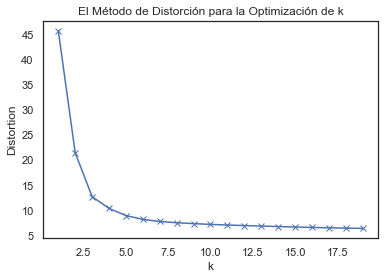

In [37]:
import scipy.spatial.distance as ssd

distortions = []
K = range(1,20)
for k in K:
    print ('calculando ',k,' clusters')
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(questions_df)
    distortions.append(sum(np.min(ssd.cdist(questions_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / questions_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('El Método de Distorción para la Optimización de k')
plt.show()

/home/arturo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


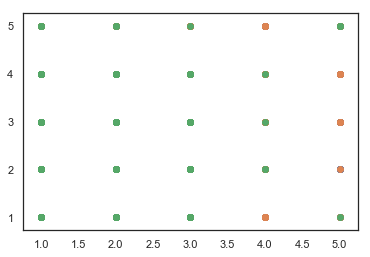

In [93]:
#std_questions_df=(questions_df-questions_df.mean())/questions_df.std()

kmeanModel = KMeans(n_clusters=3)
result=kmeanModel.fit_predict(questions_df)

questions_df['labels']=result

for i,lab in enumerate(set(result)):
    #data
    df=questions_df[questions_df['labels']==lab].iloc[:,[1,2]]
    
    x=df.iloc[:,0]
    y=df.iloc[:,1]
    plt.scatter(x,y)
       
    #centroid
    #x=centroids[i,1]
    #y=centroids[i,2]
    #plt.scatter(x,y,color='blue')
        
plt.show()

**3.** En la siguientes celdas se implementa un Análisis de Componentes Principales (PCA) con únicamente 2 componentes principales. Esto lo hacemos debido a que deseamos graficar los resultados en 2 dimensiones. 

Utiliza el comando `pca.explained_variance_ratio_.sum()` para graficar la varianza total explicada por los componentes principales, variando el número de componentes entre 1 y 28. Basado en la gráfica, ¿es razonable utilizar 2 componentes principales?

In [80]:
from sklearn.decomposition import PCA

components=2
X=questions_df-questions_df.mean() #debemos restar la media a los datos para centrarlos

pca = PCA(n_components=components)
principalComponents = pca.fit_transform(X) #transforma los datos al espacio de las componentes principales

print('Porcentaje de la varianza explicada por', components,'componente(s): ',pca.explained_variance_ratio_.sum())
print()

principal_df = pd.DataFrame(data = principalComponents) #crea un dataframe de los datos transformados
print("Comparación de datos en ambos espacios:",principal_df.shape, questions_df.shape) #tienen el mismo no. de columnas
print()
print()

print("Identificar ejes de los componentes")
print(pca.components_) #los vectores en el espacio original (X) que describen los ejes de los componentes principales 
print()

print("Al tranformarlos al espacio de los componentes principales obtenemos vectores (casi) unitarios")
print(pca.transform(pca.components_[0].reshape(1,-1))) #(1,0)
print(pca.transform(pca.components_[1].reshape(1,-1))) #(0,1)

Porcentaje de la varianza explicada por 2 componente(s):  0.8671381678891085

Comparación de datos en ambos espacios: (5820, 2) (5820, 28)


Identificar ejes de los componentes
[[-0.17872911 -0.18696044 -0.18218529 -0.18417011 -0.19021407 -0.18708119
  -0.1878324  -0.18678649 -0.18239155 -0.19236264 -0.18669482 -0.1862382
  -0.19227288 -0.19118139 -0.19023804 -0.19628846 -0.18088329 -0.19357879
  -0.19273593 -0.19319851 -0.19110602 -0.19085911 -0.19483935 -0.19313335
  -0.18889574 -0.19086936 -0.18975553 -0.18866989]
 [ 0.35645673  0.23223503  0.11551155  0.24533528  0.20717759  0.20075314
   0.24290761  0.24901577  0.12919618  0.1891172   0.1105148   0.21203229
  -0.1061603  -0.15629705 -0.15533847 -0.04865706 -0.26259518 -0.1290584
  -0.15363392 -0.19670071 -0.22007368 -0.22347198 -0.10278122 -0.06210583
  -0.20787213 -0.12045026 -0.07204025 -0.21401477]]

Al tranformarlos al espacio de los componentes principales obtenemos vectores (casi) unitarios
[[1.00000000e+00 5.03511018e-17]]


Porcentaje de la varianza explicada por 1 componente(s):  0.8219814547579237
Porcentaje de la varianza explicada por 2 componente(s):  0.8671381678891082
Porcentaje de la varianza explicada por 3 componente(s):  0.8817380436600641
Porcentaje de la varianza explicada por 4 componente(s):  0.8945876312103704
Porcentaje de la varianza explicada por 5 componente(s):  0.9049477290266541
Porcentaje de la varianza explicada por 6 componente(s):  0.9142653598146792
Porcentaje de la varianza explicada por 7 componente(s):  0.9215492126268657
Porcentaje de la varianza explicada por 8 componente(s):  0.9280798402440652
Porcentaje de la varianza explicada por 9 componente(s):  0.9341346304939253
Porcentaje de la varianza explicada por 10 componente(s):  0.9392526010846401
Porcentaje de la varianza explicada por 11 componente(s):  0.944242315754275
Porcentaje de la varianza explicada por 12 componente(s):  0.9490851519267766
Porcentaje de la varianza explicada por 13 componente(s):  0.9534401531878

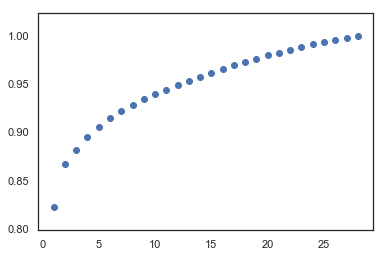

In [43]:
variances_list=[]

for n in range(1,29):
    components=n
    pca = PCA(n_components=components)
    principalComponents = pca.fit_transform(questions_df) #transforma los datos al espacio de las componentes principales
    explained_var=pca.explained_variance_ratio_.sum()
    variances_list.append(explained_var)
    print ('Porcentaje de la varianza explicada por', components,'componente(s): ',explained_var)
    
plt.scatter(range(1,29),variances_list)
plt.show()

**4.** Repite el inciso 2, con el mismo algoritmo y método de evaluación, pero ahora utiliza los datos de `principal_df` para la clusterización. Grafica los datos de `principal_df`, coloreando cada punto según el cluster correspondiente.

calculando  1  clusters
calculando  2  clusters
calculando  3  clusters
calculando  4  clusters
calculando  5  clusters
calculando  6  clusters
calculando  7  clusters
calculando  8  clusters
calculando  9  clusters
calculando  10  clusters
calculando  11  clusters
calculando  12  clusters
calculando  13  clusters
calculando  14  clusters
calculando  15  clusters
calculando  16  clusters
calculando  17  clusters
calculando  18  clusters
calculando  19  clusters


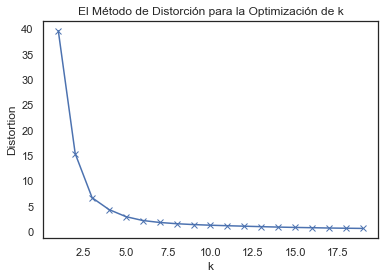

In [81]:
import scipy.spatial.distance as ssd

distortions = []
K = range(1,20)
for k in K:
    print ('calculando ',k,' clusters')
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(principal_df)
    distortions.append(sum(np.min(ssd.cdist(principal_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)**2) / principal_df.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('El Método de Distorción para la Optimización de k')
plt.show()

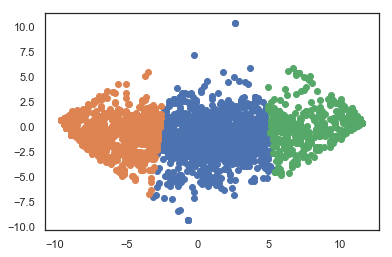

In [85]:
kmeanModel = KMeans(n_clusters=3)
result=kmeanModel.fit_predict(principal_df)

principal_df['labels']=result

for i in set(result):
    x=principal_df[principal_df['labels']==i].iloc[:,0]
    y=principal_df[principal_df['labels']==i].iloc[:,1]
    plt.scatter(x,y)
plt.show()

**5.** Ahora compararemos los resultados de los incisos 2 y 4. Responde las siguientes preguntas:

- ¿En qué caso se obtuvo la distinción más clara de clusters según la gráfica?
- ¿Cuál es la interpretación de los clusters y centroides en el espacio original?
- ¿Cuál es la interpretación de los clusters y centroides en el espacio de los componentes principales?
- ¿Se obtuvieron los mismos parámetros para el algoritmo en ambos casos? 
- ¿Consideras que alguno de los resultados es mejor? Argumenta.